## 1. Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U \
"transformers>=4.41,<5" \
"tokenizers>=0.19,<0.23" \
"sentence-transformers==5.2.0"


In [ ]:
!pip install -U "tensorflow==2.19.0" "tf-keras~=2.19" "tensorflow-text==2.19.0" "ml-dtypes>=0.5.0" "numpy>=2.0"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 129.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.


In [ ]:
!pip install -U "protobuf<6,>=5.29.1"


In [ ]:
!pip install -U "numpy<2.1"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 117.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


In [ ]:
!pip install unidecode

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install -U "ml_dtypes>=0.5.0"


In [ ]:
import pandas as pd
import numpy as np, ml_dtypes
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")


# It helps to remove the accented characters
import unidecode

from nltk.tokenize import word_tokenize,sent_tokenize,regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re,string,unicodedata
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup

from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score,f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
import tf_keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,Dropout,Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import transformers
from transformers import TFBertModel
import tokenizers
import json

In [ ]:
print("numpy:", np.__version__)
print("ml_dtypes:", ml_dtypes.__version__)
print("tensorflow:", tf.__version__)
print("tf_keras:", tf_keras.__version__)

numpy: 2.0.2
ml_dtypes: 0.5.4
tensorflow: 2.19.0
tf_keras: 2.19.0


In [ ]:
import os
os.environ["TRANSFORMERS_VERBOSITY"] = "error"

from transformers.utils import logging
logging.set_verbosity_warning()
logging.set_verbosity_error()
logging.disable_progress_bar()


# 2. Data Extraction and Cleaning

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/thought classification/cleaned_df.csv')

In [ ]:
data.head()

,Thought,Label,cleaned_text,Thought_clean
0,Everyone is probably mad at me,negative,everyone is probably mad at me,everyone probably mad me
1,You're braver than you believe,positive,you are brave than you believe,you brave you believe
2,"When I open my eyes, you're all that I want to...",positive,when i open my eyes you are all that i want to...,me open eye you all me want see
3,They clearly don’t want to be friends with me ...,negative,they clearly do not want to be friends with me...,they clearly not want friend me anymore
4,I've never done it before.,negative,i have never done it before,me never done


In [ ]:
data.tail()

,Thought,Label,cleaned_text,Thought_clean
129075,Their appreciation for complexity allows them ...,positive,their appreciation for complexity allows them ...,appreciation complexity allows they see interc...
129076,I can't wait to go on vacation next month.,negative,i can not wait to go on vacation next month,me can not wait go vacation next month
129077,Itâ€™s OK to SCREW Up! Nigel Raw,positive,ok to screw up nigel raw,ok screw nigel raw
129078,Itâ€™s here. Itâ€™s beautiful. Itâ€™s signed. ...,positive,here beautiful signed it fits right in,beautiful signed fit right
129079,Stuck On You â€“ Cover by Alicia Widar,negative,stuck on you cover by alicia wider,stuck you cover alicia wider


In [ ]:
## Assess the shape of the data
print("The Shape of the Dataset",data.shape)

The Shape of the Dataset (129080, 4)


In [ ]:
data.describe()

,Thought,Label,cleaned_text,Thought_clean
count,129080,129080,129003,128902
unique,129051,2,127292,125069
top,Making a friend choose a side,positive,help,me
freq,2,71185,21,70


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129080 entries, 0 to 129079
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Thought        129080 non-null  object
 1   Label          129080 non-null  object
 2   cleaned_text   129003 non-null  object
 3   Thought_clean  128902 non-null  object
dtypes: object(4)
memory usage: 3.9+ MB


In [ ]:
data['Label'].unique()

array(['negative', 'positive'], dtype=object)

In [ ]:
print(data['Label'].value_counts())

Label
positive    71185
negative    57895
Name: count, dtype: int64


## **Predictive Modelling using Deep Learning**

In [ ]:
# =========================
# A) Plot Learning Curve (your function, unchanged)
# =========================
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig , ax = plt.subplots(1,2,figsize = (10,5))

  ax[0].plot(epochRange,history.history['accuracy'],label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['val_accuracy'],label = 'Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend()
  ax[1].plot(epochRange,history.history['loss'],label = 'Training Loss')
  ax[1].plot(epochRange,history.history['val_loss'],label = 'Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Loss')
  ax[1].legend()
  fig.tight_layout()
  plt.show()

In [ ]:
# -----------------------------
# B) Prepare full dataset (ONLY Thought_clean + Label)
# -----------------------------

X_all = data["Thought_clean"].astype(str).reset_index(drop=True)

# Convert labels to binary (positive = 1, else = 0)
y_all = (
    data["Label"]
    .astype(str)
    .str.strip()
    .str.lower()
    .map(lambda x: 1 if x == "positive" else 0)
    .astype(int)
    .reset_index(drop=True)
)

In [ ]:
# Remove any NaNs if they exist
mask = X_all.notna() & y_all.notna()
X_all = X_all[mask].reset_index(drop=True)
y_all = y_all[mask].reset_index(drop=True)

In [ ]:
print("NaNs in X:", X_all.isna().sum())
print("NaNs in y:", y_all.isna().sum())
print("Dataset size:", len(X_all))

NaNs in X: 0
NaNs in y: 0
Dataset size: 129080


### **BERT Based Models**

In [ ]:
# -----------------------------
# C) Global settings
# -----------------------------
n_splits = 5
max_seq_len = 128
epochs = 5
batch_size = 32
lr = 1.5e-5



In [ ]:
# -----------------------------
# D) 95% CI for mean accuracy across folds
# -----------------------------
def mean_std_ci(values, ci=0.95):
    values = np.asarray(values, dtype=float)
    n = len(values)
    mean = values.mean()
    std = values.std(ddof=1) if n > 1 else 0.0
    if n <= 1:
        return mean, std, (mean, mean)

    try:
        from scipy.stats import t
        tcrit = t.ppf((1 + ci) / 2, df=n - 1)
    except Exception:
        tcrit = 1.96  # fallback

    se = std / np.sqrt(n)
    return mean, std, (mean - tcrit * se, mean + tcrit * se)


In [ ]:
class BertBinaryClassifier(tf.keras.Model):
      def __init__(self, transformer, **kwargs):
          super().__init__(**kwargs)
          self.transformer = transformer
          self.d1 = Dense(128, activation="relu")
          self.drop = Dropout(0.5)
          self.out = Dense(1, activation="sigmoid")

      def call(self, inputs, training=False):
          outputs = self.transformer(inputs, training=training)
          cls_token = outputs.last_hidden_state[:, 0, :]
          x = self.d1(cls_token)
          x = self.drop(x, training=training)
          return self.out(x)

In [ ]:
def plot_confusion_heatmap(y_true, y_pred, title="Confusion Matrix"):
    cf = confusion_matrix(y_true, y_pred)
    cf_norm = cf / np.sum(cf)

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cf_norm,
        annot=True,
        fmt=".2%",
        cmap="Blues",
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"]
    )
    plt.title(title)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.tight_layout()
    plt.show()

In [ ]:
# =========================
# E) 5-fold CV training/evaluation
# =========================

def run_cv_tf(
    X_all, y_all,
    model_title,
    model_name,
    TF_BACKBONE_CLASS,
    n_splits,
    max_seq_len,
    epochs,
    batch_size,
    lr,
    plot_first_fold_curve=False,
    show_heatmap=True,
    random_state=42
):
    tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    fold_metrics = []
    all_true = []
    all_pred = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_all, y_all), start=1):
        print(f"\n[{model_title}] ==================== Fold {fold}/{n_splits} ====================")

        # Prevent TF memory buildup across folds
        tf.keras.backend.clear_session()

        X_train_full = X_all.iloc[train_idx]
        y_train_full = y_all.iloc[train_idx]
        X_test = X_all.iloc[test_idx]
        y_test = y_all.iloc[test_idx]

        # Validation split INSIDE training fold
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_full, y_train_full,
            test_size=0.2,
            random_state=random_state,
            stratify=y_train_full
        )

        # -----------------------------
        # Tokenize (NumPy, compatible with transformers)
        # -----------------------------
        train_enc = tokenizer(X_train.tolist(), max_length=max_seq_len, truncation=True, padding="max_length", return_tensors="np")
        val_enc   = tokenizer(X_val.tolist(),   max_length=max_seq_len, truncation=True, padding="max_length", return_tensors="np")
        test_enc  = tokenizer(X_test.tolist(),  max_length=max_seq_len, truncation=True, padding="max_length", return_tensors="np")

        # -----------------------------
        # Build tf.data datasets
        # -----------------------------
        train_ds = tf.data.Dataset.from_tensor_slices((
            {
                "input_ids": tf.constant(train_enc["input_ids"]),
                "attention_mask": tf.constant(train_enc["attention_mask"])
            },
            tf.constant(y_train.values)
        )).shuffle(1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((
            {
                "input_ids": tf.constant(val_enc["input_ids"]),
                "attention_mask": tf.constant(val_enc["attention_mask"])
            },
            tf.constant(y_val.values)
        )).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        test_ds = tf.data.Dataset.from_tensor_slices((
            {
                "input_ids": tf.constant(test_enc["input_ids"]),
                "attention_mask": tf.constant(test_enc["attention_mask"])
            },
            tf.constant(y_test.values)
        )).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        # -----------------------------
        # Build model fresh each fold (Backbone + classifier)
        # -----------------------------
        backbone = TF_BACKBONE_CLASS.from_pretrained(model_name, from_pt=True, use_safetensors=False)
        model = BertBinaryClassifier(backbone)
        model.compile(
            optimizer=Adam(lr),
            loss="binary_crossentropy",
            metrics=["accuracy"])


        # -----------------------------
        # Train
        # -----------------------------
        callbacks = [
            tf.keras.callbacks.EarlyStopping(
                monitor="val_loss",
                patience=1,
                restore_best_weights=True
            )
        ]
        history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=epochs,
            callbacks=callbacks,
            verbose=1
        )

        if fold == 1:
            plotLearningCurve(history, epochs)

        # -----------------------------
        # Evaluate (Keras)
        # -----------------------------
        result = model.evaluate(test_ds, verbose=0)
        fold_loss = float(result[0]) if isinstance(result, (list, tuple)) else float(result)

        # -----------------------------
        # Predict + sklearn metrics
        # -----------------------------
        probs = model.predict(test_ds, verbose=0).ravel()
        preds = (probs >= 0.5).astype(int)

        # sklearn metrics (robust + consistent)
        acc  = accuracy_score(y_test, preds)
        prec = precision_score(y_test, preds, zero_division=0)
        rec  = recall_score(y_test, preds, zero_division=0)
        f1   = f1_score(y_test, preds, zero_division=0)

        #Classification report
        rep = classification_report(
            y_test, preds,
            output_dict=True,
            zero_division=0
        )

        fold_metrics.append({
                "model": model_title,
                "fold": fold,
                "loss": fold_loss,

                # overall
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "f1": f1,

                # class-wise
                "pos_precision": rep["1"]["precision"],
                "pos_recall":    rep["1"]["recall"],
                "pos_f1":        rep["1"]["f1-score"],
                "neg_precision": rep["0"]["precision"],
                "neg_recall":    rep["0"]["recall"],
                "neg_f1":        rep["0"]["f1-score"],
        })

        all_true.append(y_test.values)
        all_pred.append(preds)

        print(f"[{model_title}] Fold {fold} -> loss={fold_loss:.4f} acc={acc:.4f} prec={prec:.4f} rec={rec:.4f} f1={f1:.4f}")

    # ---- Fold-wise table
    metrics_df = pd.DataFrame(fold_metrics)
    print(f"\n[{model_title}] ==================== Fold-wise metrics ====================")
    print(metrics_df)

    # =========================
    # Class-wise summary TABLE (mean ± SD across folds)
    # =========================
    classwise_summary = pd.DataFrame({
        "model": [model_title]*6,
        "Class": ["Positive", "Positive", "Positive", "Negative", "Negative", "Negative"],
        "Metric": ["Precision", "Recall", "F1-score", "Precision", "Recall", "F1-score"],
        "Mean": [
            metrics_df["pos_precision"].mean(),
            metrics_df["pos_recall"].mean(),
            metrics_df["pos_f1"].mean(),
            metrics_df["neg_precision"].mean(),
            metrics_df["neg_recall"].mean(),
            metrics_df["neg_f1"].mean()
        ],
        "Std": [
            metrics_df["pos_precision"].std(ddof=1),
            metrics_df["pos_recall"].std(ddof=1),
            metrics_df["pos_f1"].std(ddof=1),
            metrics_df["neg_precision"].std(ddof=1),
            metrics_df["neg_recall"].std(ddof=1),
            metrics_df["neg_f1"].std(ddof=1)
        ]
    })

    classwise_summary["Mean ± SD"] = classwise_summary.apply(
        lambda r: f"{r['Mean']:.4f} ± {r['Std']:.4f}",
        axis=1
    )

    print(f"\n[{model_title}] ==================== Class-wise summary (mean ± SD across folds) ====================")
    print(classwise_summary[["model", "Class", "Metric", "Mean ± SD"]])

    # =========================
    # Overall summary (mean ± SD) + 95% CI for Accuracy
    # =========================
    acc_mean, acc_std, (lo, hi) = mean_std_ci(metrics_df["accuracy"].values, ci=0.95)

    print(f"\n[{model_title}] ==================== Overall summary across folds ====================")
    print(f"[{model_title}] ACCURACY mean={acc_mean:.4f} ± {acc_std:.4f} | 95% CI [{lo:.4f}, {hi:.4f}]")
    print(f"[{model_title}] PRECISION mean={metrics_df['precision'].mean():.4f} ± {metrics_df['precision'].std(ddof=1):.4f}")
    print(f"[{model_title}] RECALL    mean={metrics_df['recall'].mean():.4f} ± {metrics_df['recall'].std(ddof=1):.4f}")
    print(f"[{model_title}] F1        mean={metrics_df['f1'].mean():.4f} ± {metrics_df['f1'].std(ddof=1):.4f}")


    # ---- Confusion matrix heatmap (out-of-fold)
    y_true_all = np.concatenate(all_true)
    y_pred_all = np.concatenate(all_pred)

    if show_heatmap:
        plot_confusion_heatmap(y_true_all, y_pred_all, title=f"Confusion Matrix of {model_title} model")

    # Summary + CI (accuracy)
    acc_mean, acc_std, (lo, hi) = mean_std_ci(
        metrics_df["accuracy"].values, ci=0.95
    )

    # Summary dict for comparison tables
    summary = {
        "model": model_title,

        # overall accuracy + CI
        "acc_mean": acc_mean, "acc_std": acc_std, "acc_ci_low": lo, "acc_ci_high": hi,

        # overall (pos-class default)
        "prec_mean": metrics_df["precision"].mean(), "prec_std": metrics_df["precision"].std(ddof=1),
        "rec_mean":  metrics_df["recall"].mean(),    "rec_std":  metrics_df["recall"].std(ddof=1),
        "f1_mean":   metrics_df["f1"].mean(),        "f1_std":   metrics_df["f1"].std(ddof=1),

        # class-wise
        "pos_prec_mean": metrics_df["pos_precision"].mean(), "pos_prec_std": metrics_df["pos_precision"].std(ddof=1),
        "pos_rec_mean":  metrics_df["pos_recall"].mean(),    "pos_rec_std":  metrics_df["pos_recall"].std(ddof=1),
        "pos_f1_mean":   metrics_df["pos_f1"].mean(),        "pos_f1_std":   metrics_df["pos_f1"].std(ddof=1),

        "neg_prec_mean": metrics_df["neg_precision"].mean(), "neg_prec_std": metrics_df["neg_precision"].std(ddof=1),
        "neg_rec_mean":  metrics_df["neg_recall"].mean(),    "neg_rec_std":  metrics_df["neg_recall"].std(ddof=1),
        "neg_f1_mean":   metrics_df["neg_f1"].mean(),        "neg_f1_std":   metrics_df["neg_f1"].std(ddof=1),
    }

    return metrics_df, classwise_summary, summary, y_true_all, y_pred_all



**BERT**


[BERT] ==================== Fold 1/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 116s 33ms/step - accuracy: 0.6062 - loss: 0.6540 - val_accuracy: 0.7996 - val_loss: 0.4753
Epoch 2/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.7546 - loss: 0.5147 - val_accuracy: 0.8188 - val_loss: 0.4277
Epoch 3/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.7847 - loss: 0.4738 - val_accuracy: 0.8263 - val_loss: 0.4105
Epoch 4/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.7950 - loss: 0.4584 - val_accuracy: 0.8289 - val_loss: 0.4007
Epoch 5/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.7977 - loss: 0.4469 - val_accuracy: 0.8315 - val_loss: 0.3945


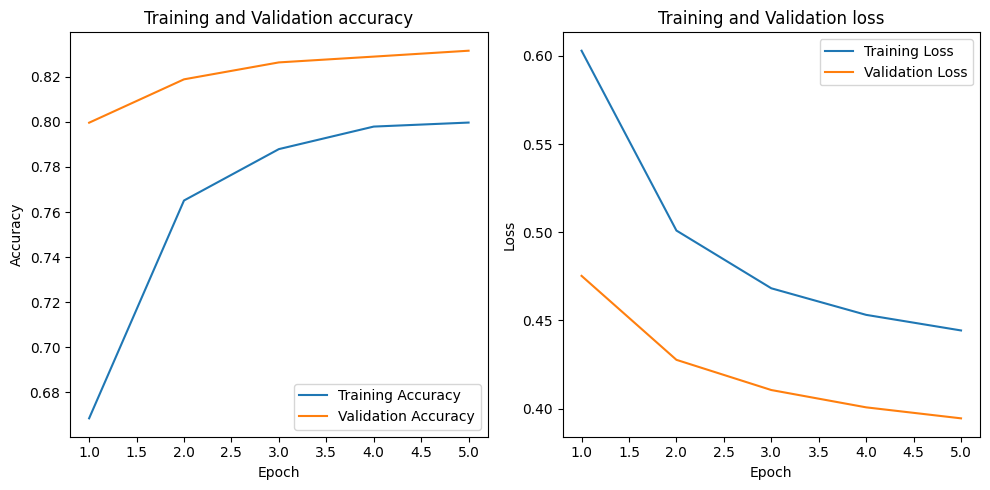

[BERT] Fold 1 -> loss=0.3996 acc=0.8268 prec=0.8399 rec=0.8474 f1=0.8437

[BERT] ==================== Fold 2/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 108s 30ms/step - accuracy: 0.5903 - loss: 0.6796 - val_accuracy: 0.8009 - val_loss: 0.4675
Epoch 2/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.7542 - loss: 0.5116 - val_accuracy: 0.8227 - val_loss: 0.4189
Epoch 3/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.7839 - loss: 0.4691 - val_accuracy: 0.8299 - val_loss: 0.4032
Epoch 4/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.7943 - loss: 0.4559 - val_accuracy: 0.8323 - val_loss: 0.3949
Epoch 5/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.8022 - loss: 0.4421 - val_accuracy: 0.8352 - val_loss: 0.3891
[BERT] Fold 2 -> loss=0.3983 acc=0.8288 prec=0.8411 rec=0.8502 f1=0.8456

[BERT] ==================== Fold 3/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 108s 30ms/step - accuracy: 0.6141 - los

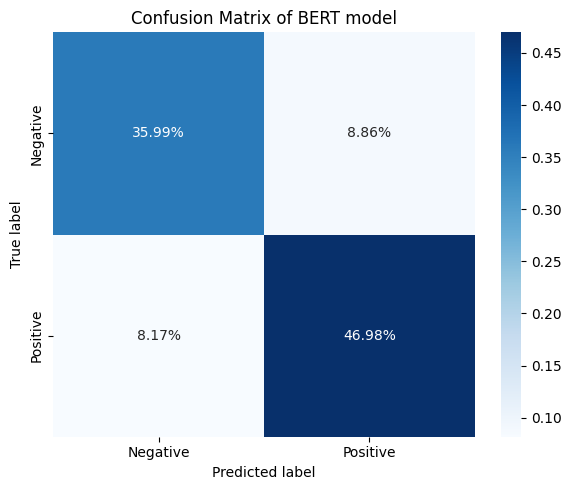

In [ ]:
bert_df, bert_classwise, bert_summary, bert_true, bert_pred = run_cv_tf(
    X_all, y_all,
    model_title="BERT",
    model_name="bert-base-uncased",
    TF_BACKBONE_CLASS=transformers.TFBertModel,
    n_splits=n_splits,
    max_seq_len=max_seq_len,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    plot_first_fold_curve=True,
    show_heatmap=True
)


### **Distilbert Model**


[DistilBERT] ==================== Fold 1/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - accuracy: 0.6247 - loss: 0.6388 - val_accuracy: 0.8168 - val_loss: 0.4603
Epoch 2/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.7789 - loss: 0.4849 - val_accuracy: 0.8309 - val_loss: 0.4079
Epoch 3/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8028 - loss: 0.4433 - val_accuracy: 0.8363 - val_loss: 0.3886
Epoch 4/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8121 - loss: 0.4266 - val_accuracy: 0.8396 - val_loss: 0.3779
Epoch 5/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8203 - loss: 0.4118 - val_accuracy: 0.8421 - val_loss: 0.3710


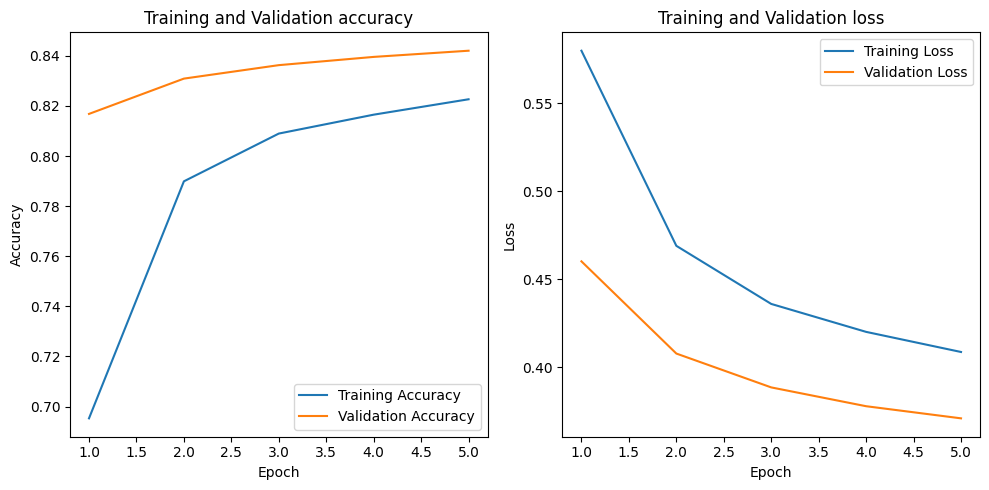

[DistilBERT] Fold 1 -> loss=0.3772 acc=0.8398 prec=0.8546 rec=0.8551 f1=0.8548

[DistilBERT] ==================== Fold 2/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step - accuracy: 0.6175 - loss: 0.6462 - val_accuracy: 0.8157 - val_loss: 0.4581
Epoch 2/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.7791 - loss: 0.4845 - val_accuracy: 0.8310 - val_loss: 0.4069
Epoch 3/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8048 - loss: 0.4426 - val_accuracy: 0.8369 - val_loss: 0.3877
Epoch 4/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8152 - loss: 0.4239 - val_accuracy: 0.8385 - val_loss: 0.3772
Epoch 5/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8184 - loss: 0.4165 - val_accuracy: 0.8421 - val_loss: 0.3700
[DistilBERT] Fold 2 -> loss=0.3784 acc=0.8390 prec=0.8588 rec=0.8474 f1=0.8530

[DistilBERT] ==================== Fold 3/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step - 

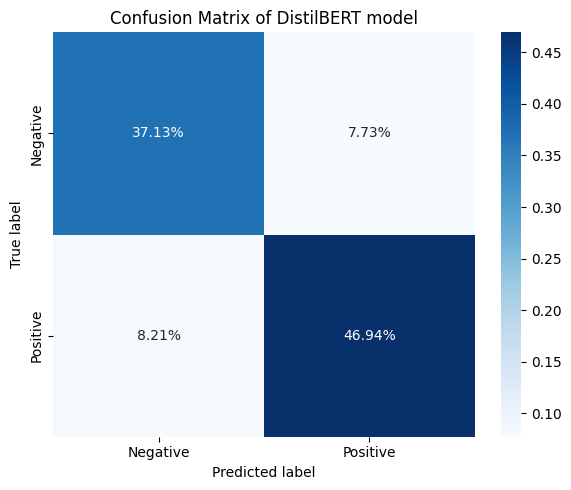

In [ ]:
distil_df, distil_classwise, distil_summary, distil_true, distil_pred = run_cv_tf(
    X_all, y_all,
    model_title="DistilBERT",
    model_name="distilbert-base-uncased",
    TF_BACKBONE_CLASS=transformers.TFDistilBertModel,
    n_splits=n_splits,
    max_seq_len=max_seq_len,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    plot_first_fold_curve=False,
    show_heatmap=True
)


### **RoBERTa Model**


[RoBERTa] ==================== Fold 1/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 109s 30ms/step - accuracy: 0.5199 - loss: 0.7206 - val_accuracy: 0.5515 - val_loss: 0.6755
Epoch 2/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.5589 - loss: 0.6868 - val_accuracy: 0.5551 - val_loss: 0.6605
Epoch 3/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.6013 - loss: 0.6651 - val_accuracy: 0.6025 - val_loss: 0.6446
Epoch 4/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.6399 - loss: 0.6472 - val_accuracy: 0.6693 - val_loss: 0.6274
Epoch 5/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.6752 - loss: 0.6298 - val_accuracy: 0.7209 - val_loss: 0.6097


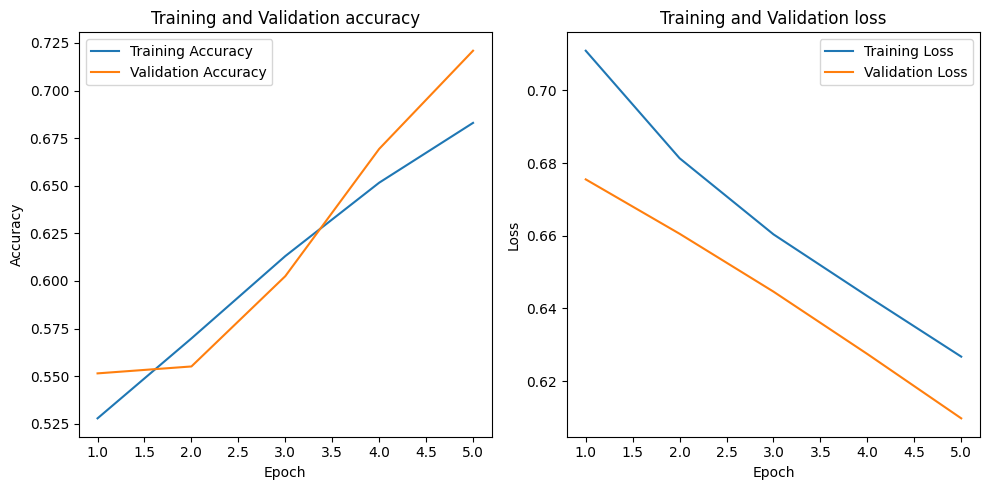

[RoBERTa] Fold 1 -> loss=0.6111 acc=0.7180 prec=0.6754 rec=0.9406 f1=0.7863

[RoBERTa] ==================== Fold 2/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 111s 30ms/step - accuracy: 0.5161 - loss: 0.7307 - val_accuracy: 0.5515 - val_loss: 0.6725
Epoch 2/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.5584 - loss: 0.6870 - val_accuracy: 0.5589 - val_loss: 0.6580
Epoch 3/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.6024 - loss: 0.6635 - val_accuracy: 0.6127 - val_loss: 0.6419
Epoch 4/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.6432 - loss: 0.6446 - val_accuracy: 0.6915 - val_loss: 0.6247
Epoch 5/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.6727 - loss: 0.6289 - val_accuracy: 0.7178 - val_loss: 0.6076
[RoBERTa] Fold 2 -> loss=0.6075 acc=0.7166 prec=0.6739 rec=0.9417 f1=0.7856

[RoBERTa] ==================== Fold 3/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 110s 30ms/step - accuracy: 

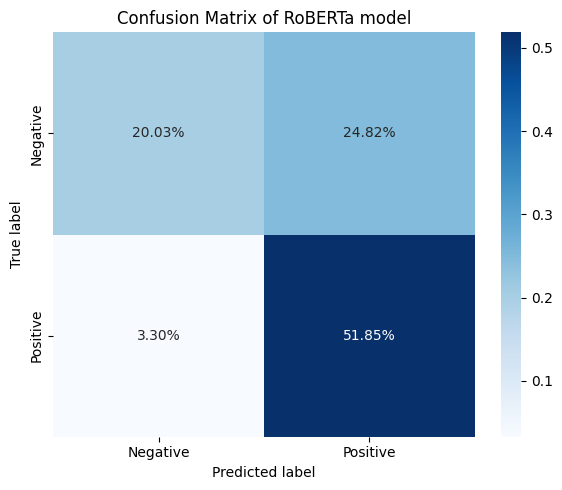

In [ ]:
roberta_df, roberta_classwise, roberta_summary, roberta_true, roberta_pred = run_cv_tf(
    X_all, y_all,
    model_title="RoBERTa",
    model_name="roberta-base",
    TF_BACKBONE_CLASS=transformers.TFRobertaModel,
    n_splits=n_splits,
    max_seq_len=max_seq_len,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    plot_first_fold_curve=False,
    show_heatmap=True
)


### **ALBERT**


[ALBERT] ==================== Fold 1/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.6025 - loss: 0.7404 - val_accuracy: 0.7505 - val_loss: 0.5181
Epoch 2/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7354 - loss: 0.5333 - val_accuracy: 0.7775 - val_loss: 0.4756
Epoch 3/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7614 - loss: 0.4963 - val_accuracy: 0.7896 - val_loss: 0.4537
Epoch 4/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.7725 - loss: 0.4744 - val_accuracy: 0.7964 - val_loss: 0.4403
Epoch 5/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.7834 - loss: 0.4578 - val_accuracy: 0.8021 - val_loss: 0.4283


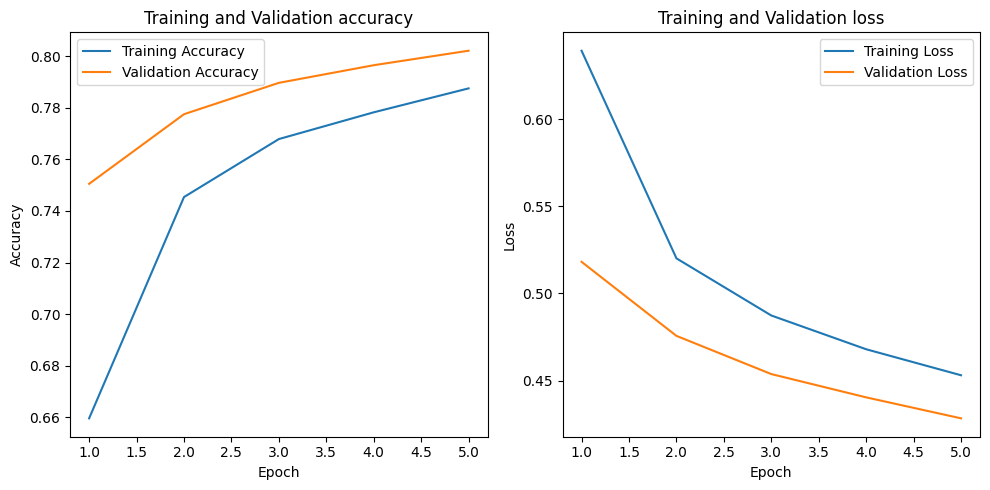

[ALBERT] Fold 1 -> loss=0.4311 acc=0.8042 prec=0.8099 rec=0.8427 f1=0.8260

[ALBERT] ==================== Fold 2/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 74s 22ms/step - accuracy: 0.5835 - loss: 0.7661 - val_accuracy: 0.7614 - val_loss: 0.5147
Epoch 2/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7304 - loss: 0.5353 - val_accuracy: 0.7858 - val_loss: 0.4690
Epoch 3/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7584 - loss: 0.4977 - val_accuracy: 0.7968 - val_loss: 0.4471
Epoch 4/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7741 - loss: 0.4737 - val_accuracy: 0.8051 - val_loss: 0.4336
Epoch 5/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7835 - loss: 0.4588 - val_accuracy: 0.8084 - val_loss: 0.4248
[ALBERT] Fold 2 -> loss=0.4286 acc=0.8058 prec=0.8142 rec=0.8393 f1=0.8266

[ALBERT] ==================== Fold 3/5 ====================
Epoch 1/5
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 74s 21ms/step - accuracy: 0.5758

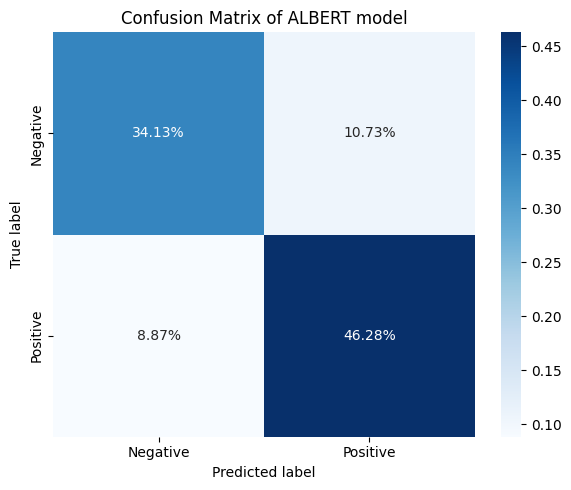

In [ ]:
albert_df, albert_classwise, albert_summary, albert_true, albert_pred = run_cv_tf(
    X_all, y_all,
    model_title="ALBERT",
    model_name="albert-base-v2",
    TF_BACKBONE_CLASS=transformers.TFAlbertModel,
    n_splits=n_splits,
    max_seq_len=max_seq_len,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    plot_first_fold_curve=False,
    show_heatmap=True
)


In [ ]:
comparison_df = pd.DataFrame([bert_summary, distil_summary, roberta_summary, albert_summary])
comparison_df


,model,acc_mean,acc_std,acc_ci_low,acc_ci_high,prec_mean,prec_std,rec_mean,rec_std,f1_mean,f1_std
0,BERT,0.830020,0.002473,0.826950,0.833090,0.841117,0.006347,0.852975,0.004717,0.846977,0.001467
1,DistilBERT,0.841509,0.002179,0.838804,0.844214,0.860521,0.005469,0.850516,0.003901,0.855471,0.001506
2,RoBERTa,0.713193,0.023114,0.684494,0.741893,0.671513,0.021649,0.942769,0.011240,0.784052,0.011318
3,ALBERT,0.803254,0.001686,0.801161,0.805347,0.812081,0.005324,0.837002,0.007072,0.824318,0.001541
